# Régression Linéaire Multiple : Version Matricielle

## 1. Modèle Mathématique (Notation Matricielle)

La régression linéaire multiple s'écrit en notation matricielle :

$$
\mathbf{y} = \mathbf{X} \cdot \mathbf{w} + \mathbf{b}
$$

### Définition des Termes

- $\mathbf{X}$ : Matrice $m \times n$, représentant les données d'entrée ($m$ échantillons, $n$ variables indépendantes).
- $\mathbf{w}$ : Vecteur colonne $n \times 1$, contenant les poids ou coefficients ($w_1, w_2, \dots, w_n$).
- $\mathbf{b}$ : Scalaire (ou vecteur $m \times 1$), représentant le biais.
- $\mathbf{y}$ : Vecteur $m \times 1$, contenant les valeurs cibles.

---

## 2. Fonction de Coût : Erreur Quadratique Moyenne (MSE)

La fonction de coût mesure l'écart entre les prédictions $\hat{\mathbf{y}}$ et les valeurs réelles $\mathbf{y}$. Elle est définie comme :

$$
J(\mathbf{w}, \mathbf{b}) = \frac{1}{2m} \| \mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y} \|^2
$$

### Développement

$$
J(\mathbf{w}, \mathbf{b}) = \frac{1}{2m} \left( (\mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y})^\top \cdot (\mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y}) \right)
$$

---

## 3. Descente de Gradient

La descente de gradient ajuste les paramètres $\mathbf{w}$ et $\mathbf{b}$ pour minimiser la fonction de coût $J$.

### Mise à Jour des Poids ($\mathbf{w}$)

$$
\mathbf{w} = \mathbf{w} - \alpha \cdot \frac{\partial J}{\partial \mathbf{w}}
$$

### Mise à Jour du Biais ($\mathbf{b}$)

$$
\mathbf{b} = \mathbf{b} - \alpha \cdot \frac{\partial J}{\partial \mathbf{b}}
$$

où $\alpha$ est le taux d'apprentissage.

---

## 4. Calcul des Gradients

### Gradient par Rapport aux Poids ($\mathbf{w}$)

$$
\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \cdot \mathbf{X}^\top \cdot \left( \mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y} \right)
$$

### Gradient par Rapport au Biais ($\mathbf{b}$)

Si $\mathbf{b}$ est constant pour tous les échantillons :

$$
\frac{\partial J}{\partial \mathbf{b}} = \frac{1}{m} \cdot \sum \left( \mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y} \right)
$$

---

## 5. Résolution Analytique (Formule Fermée)

La minimisation de $J$ peut également être résolue analytiquement avec la **formule normale** :

$$
\mathbf{w} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \cdot \mathbf{X}^\top \cdot \mathbf{y}
$$

### Ajout du Biais

Pour inclure $\mathbf{b}$ dans $\mathbf{w}$, on peut ajouter une colonne de $1$ à la matrice $\mathbf{X}$.

---

## 6. Interprétation des Coefficients

- Chaque coefficient $w_j$ dans $\mathbf{w}$ représente l'effet marginal de $x_j$ sur $y$, toutes les autres variables étant constantes.
- Le biais $b$ est l'interception du modèle, c'est-à-dire la valeur prédite de $y$ lorsque toutes les variables $x_1, x_2, \dots, x_n$ valent zéro.

In [4]:
import sys
import os
from sklearn.datasets import make_regression
import numpy as np
import  matplotlib.pyplot as plt
# Ajouter le dossier "Models" au chemin Python
sys.path.append(os.path.abspath("ML-Models"))


In [6]:

# Générer des données synthétiques
X, y = make_regression(n_samples=10000, n_features=3, noise=0.1)

# Ajouter une colonne de 1 pour le biais
X = np.hstack((np.ones((X.shape[0], 1)), X))


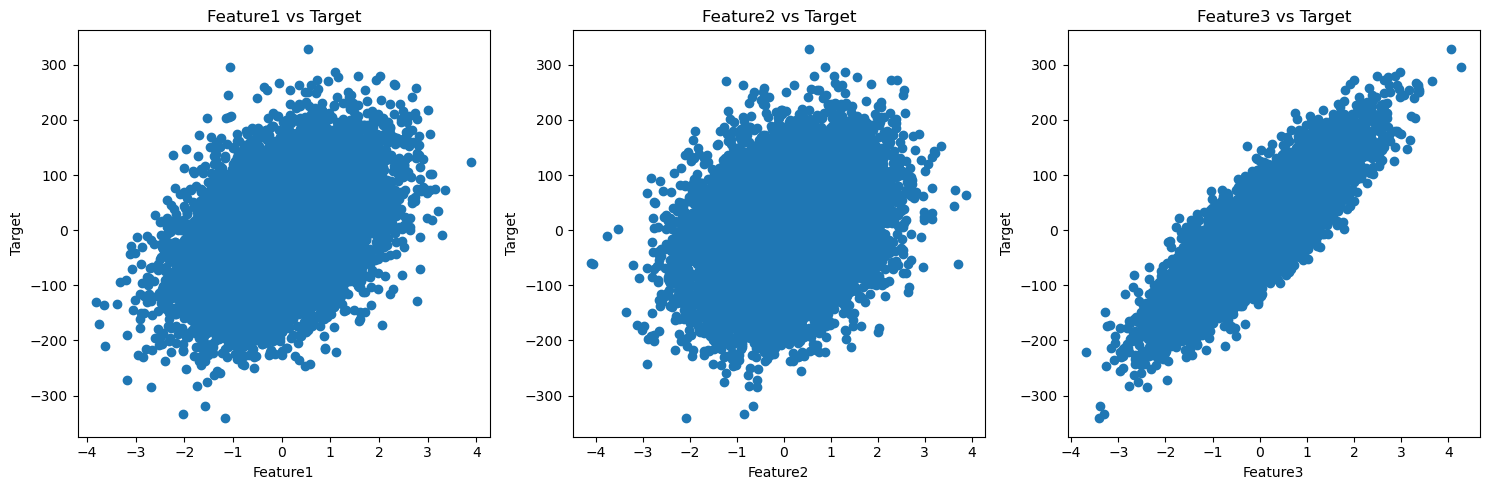

In [7]:
# Créer des graphiques scatter entre y et chaque variable x1, x2, x3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X[:, 1], y)
axs[0].set_xlabel('Feature1')
axs[0].set_ylabel('Target')
axs[0].set_title('Feature1 vs Target')

axs[1].scatter(X[:, 2], y)
axs[1].set_xlabel('Feature2')
axs[1].set_ylabel('Target')
axs[1].set_title('Feature2 vs Target')

axs[2].scatter(X[:, 3], y)
axs[2].set_xlabel('Feature3')
axs[2].set_ylabel('Target')
axs[2].set_title('Feature3 vs Target')

plt.tight_layout()
plt.show()

In [11]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        print("Training complete!")
        print(f"Weights: {self.weights}")
        print(f"Bias: {self.bias}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        mae = np.mean(np.abs(y - y_pred))
        r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))
        
        print(f"Mean Squared Error (MSE): {mse}") 
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"R-squared (R2): {r2}")
        
        return mse, mae, r2



In [12]:
# Créer un objet de régression linéaire
Regression_model = LinearRegression()

# Entraîner le modèle
Regression_model.fit(X, y)

# Évaluer le modèle
mse, mae, r2 = Regression_model.evaluate(X, y)



Training complete!
Weights: [3.25507859e-04 3.54093370e+01 2.40681799e+01 7.31379312e+01]
Bias: 0.0003255078587253895
Mean Squared Error (MSE): 0.009881107514066984
Mean Absolute Error (MAE): 0.07938122091423236
R-squared (R2): 0.9999986281241877


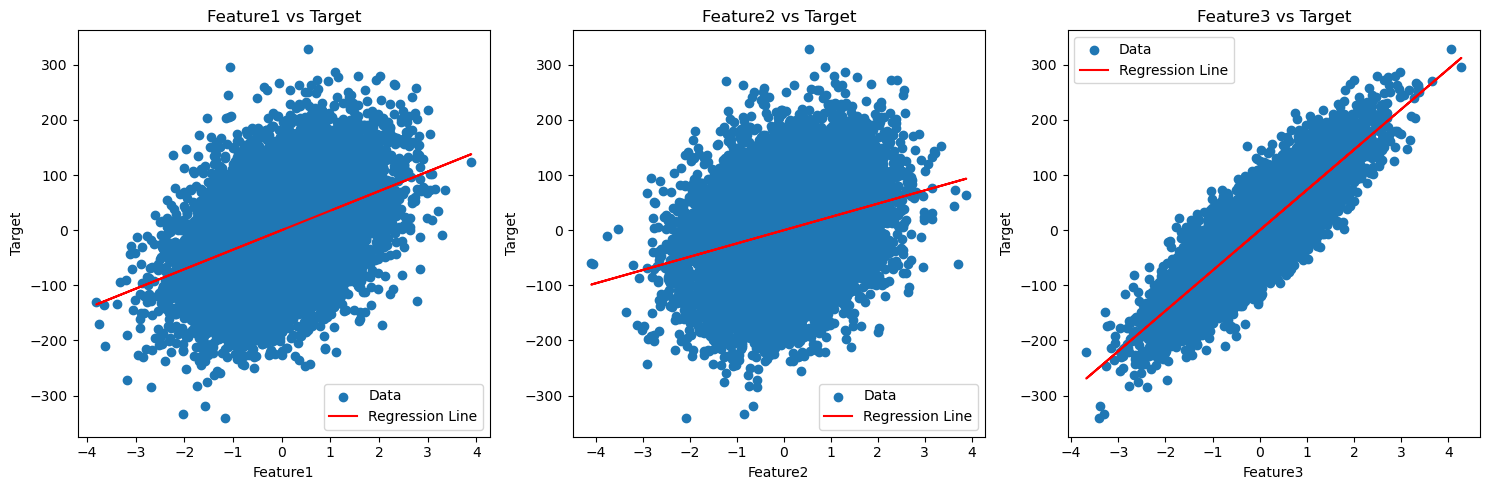

In [13]:
# Tracer la droite de régression entre chaque variable et y
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Feature 1
axs[0].scatter(X[:, 1], y, label='Data')
axs[0].plot(X[:, 1], Regression_model.predict(X) - Regression_model.weights[2] * X[:, 2] - Regression_model.weights[3] * X[:, 3], color='red', label='Regression Line')
axs[0].set_xlabel('Feature1')
axs[0].set_ylabel('Target')
axs[0].set_title('Feature1 vs Target')
axs[0].legend()

# Feature 2
axs[1].scatter(X[:, 2], y, label='Data')
axs[1].plot(X[:, 2], Regression_model.predict(X) - Regression_model.weights[1] * X[:, 1] - Regression_model.weights[3] * X[:, 3], color='red', label='Regression Line')
axs[1].set_xlabel('Feature2')
axs[1].set_ylabel('Target')
axs[1].set_title('Feature2 vs Target')
axs[1].legend()

# Feature 3
axs[2].scatter(X[:, 3], y, label='Data')
axs[2].plot(X[:, 3], Regression_model.predict(X) - Regression_model.weights[1] * X[:, 1] - Regression_model.weights[2] * X[:, 2], color='red', label='Regression Line')
axs[2].set_xlabel('Feature3')
axs[2].set_ylabel('Target')
axs[2].set_title('Feature3 vs Target')
axs[2].legend()

plt.tight_layout()
plt.show()